In [11]:
#!/usr/bin/env python

"""hh.py: A variant of the Hodgkin-Huxley equations given in the paper 
"Ion channels enable electrical communication in bacterial communities" 
[http://www.nature.com/nature/journal/v527/n7576/full/nature15709.html]."""

__author__ = "Shahnawaz Ahmed"
__email__ = "shd339@gmail.com"

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint,ode
import numpy as np
import pandas as pd
import math
# Uncomment the following line to get plots in a seperate window 
%matplotlib inline

In [19]:
# define parameters for model
params = {
        'g_K'  :        30,       #min^-1,
        'g_L'  :        0.2,      #min^-1, 
        'V_K0' :       -380,      #mV,
        'V_L0' :       -156,      #mV,
        'S_th' :        40,
        'V_th' :       -150,
        'alpha_0' :     2,
        'beta' :        1.3,
        'm'    :        1,
        'F'    :        5.6,
        'sigma':        0.2,
    'delta_K'  :        1,
    'delta_L'  :        8,
    'gamma_s'  :        0.1,
    'gamma_e'  :        10,
    'gamma_t'  :        4,
    'alpha_s'  :        1,
    'alpha_t'  :        1,
    'D'        :        13.8*(10**(-6))   
}
# Define the value of e
e = math.exp(1)

In [57]:
def HodgkinHuxley(y0,t):
    V,n,S,E,T = y0
    
    V_k   = lambda E : params['V_K0'] + params['delta_K']*E
    V_l   = lambda E : params['V_L0'] + params['delta_L']*E    
    alpha = lambda S : (params['alpha_0']*(S**params['m'])) / (params['S_th']**params['m'] + S**params['m'])
    
    # all differential equations are wrt to time
    V_diff = lambda n,V : (-1)*params['g_K']*(n**4)*(V - V_k(E)) - params['g_L']*(V - V_l(E))
    n_diff = lambda S,n : alpha(S)*(1-n) - params['beta']*n
    # verify exp formula
    S_diff = lambda V,S : (params['alpha_s']*(params['V_th'] - V))/(e**((params['V_th'] - V)/params['sigma']) - 1 ) - params['gamma_s']*S                                         
    E_diff = lambda n,V,E : params['F']*params['g_K']*(n**4)*(V - V_k(E)) - params['gamma_e']*E
    T_diff = lambda V,T : params['alpha_t']*(params['V_L0'] - V) - params['gamma_t']*T
    
    return V_diff(n,V),n_diff(S,n),S_diff(V,S),E_diff(n,V,E),T_diff(V,T)

In [58]:
# initial values
V0 = -152.0
n0 = 0.10
S0 = 100.0
E0 = 100.0
T0 = 100.0

y0 = [V0,n0,S0,E0,T0]
# time interval spacing
h = .005
t_initial = 0
t_final = 60
t = np.arange(t_initial,t_final,h)

In [59]:
# Get the solutions, Note that each row gives values after one iteration
# Use X(:,i) i = 0,1,2 to access the membrane voltage, n, Stress value etc
X = odeint(HodgkinHuxley, y0, t )

In [60]:
# Put all the values in a Pandas Data frame and label the columns
sols = pd.DataFrame(X, columns=["V","n","S","E","T"])
sols.head()

,V,n,S,E,T
0,-152.000000,0.100000,100.000000,100.000000,100.000000
1,-151.226218,0.105739,99.950016,95.134994,97.998128
2,-150.491784,0.111399,99.900135,90.510778,96.032163
3,-149.794903,0.116982,99.850964,86.116295,94.101586
4,-149.133880,0.122488,99.803977,81.941095,92.205876


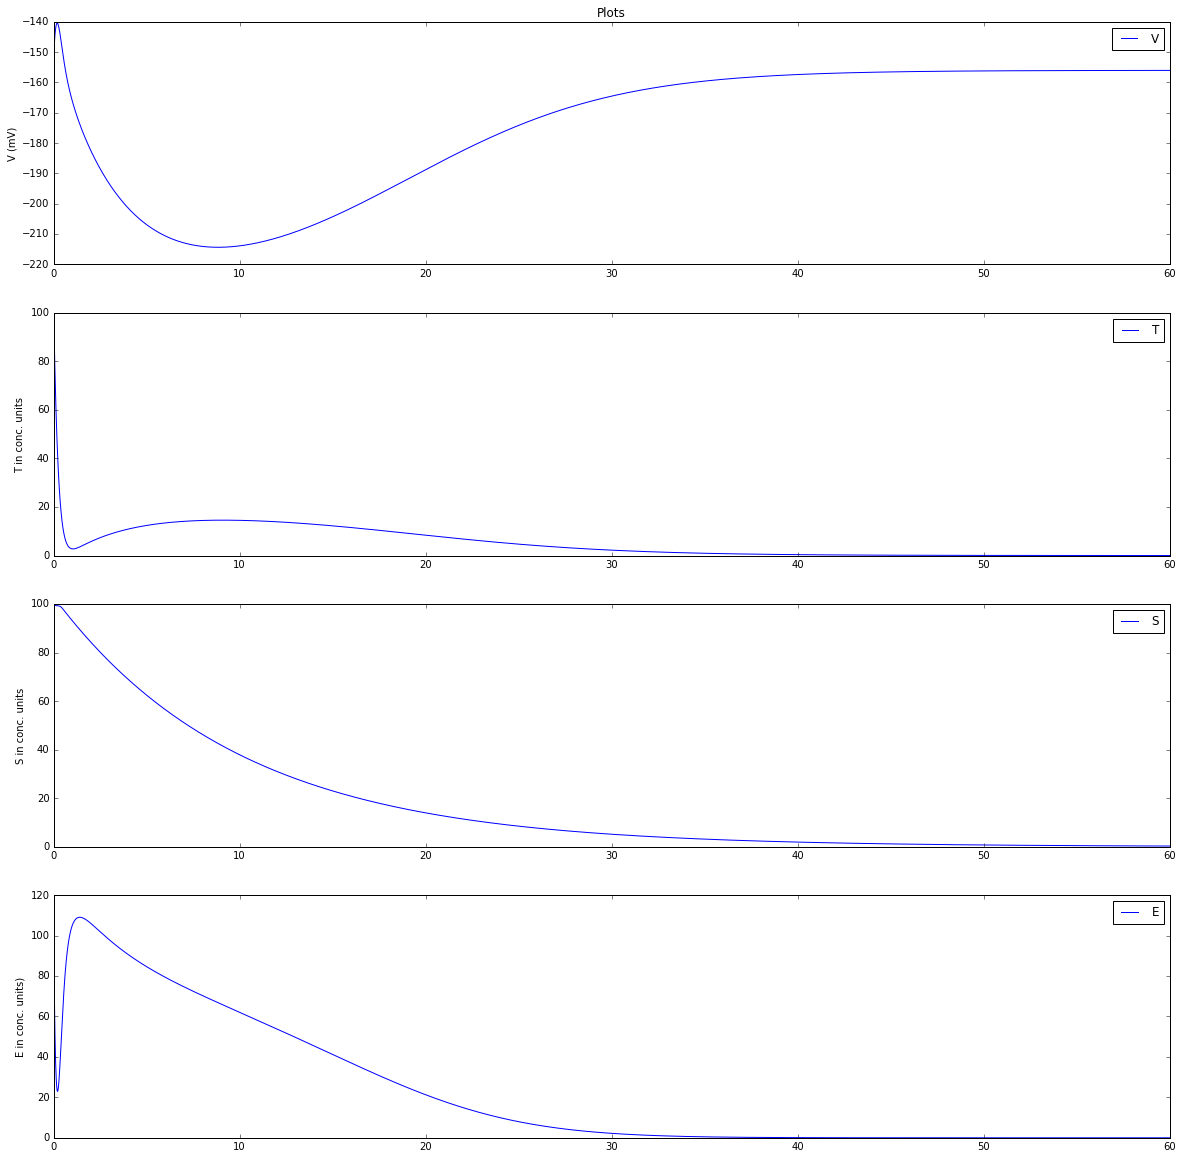

In [61]:
# We plot 4 variables V,T,S,E
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.title('Plots')

plt.subplot(4,1,1)
plt.plot(t, sols['V'])
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(4,1,2)
plt.plot(t, sols['T'])
plt.ylabel('T in conc. units')
plt.legend()


plt.subplot(4,1,3)
plt.plot(t, sols['S'])
plt.ylabel('S in conc. units')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, sols['E'])
plt.ylabel('E in conc. units)')
plt.legend()
plt.show()

plt.close()

In [56]:
sols

,V,n,S,E,T
0,-152.000000,0.100000,100.000000,100.000000,100.000000
1,-151.226218,0.105739,99.950016,95.134994,97.998128
2,-150.491784,0.111399,99.900135,90.510778,96.032163
3,-149.794903,0.116982,99.850964,86.116295,94.101586
4,-149.133880,0.122488,99.803977,81.941095,92.205876
5,-148.507117,0.127919,99.760019,77.975306,90.344518
6,-147.913104,0.133275,99.719113,74.209601,88.516996
7,-147.350419,0.138558,99.681117,70.635175,86.722799
8,-146.817721,0.143769,99.645878,67.243712,84.961419
9,-146.313744,0.148909,99.613246,64.027364,83.232352


In [49]:
# Stable conditions 
V0 = -156.000009
n0 = 0.000195
S0 = 0.004675
E0 = 0
T0 = 0.000002

# Give the shock
E0 = 200
y0 = [V0,n0,S0,E0,T0]
# time interval spacing
h = .005
t_initial = 0
t_final = 60
t = np.arange(t_initial,t_final,h)
X = odeint(HodgkinHuxley, y0, t )

sols = pd.DataFrame(X, columns=["V","n","S","E","T"])
sols.head()

,V,n,S,E,T
0,-156.000009,0.000195,0.004675,200.000000,0.000002
1,-154.440137,0.000195,0.004673,190.245886,-0.003905
2,-152.957900,0.000195,0.004670,180.967484,-0.015261
3,-151.549510,0.000195,0.004669,172.141596,-0.033546
4,-150.211365,0.000195,0.004792,163.746151,-0.058265


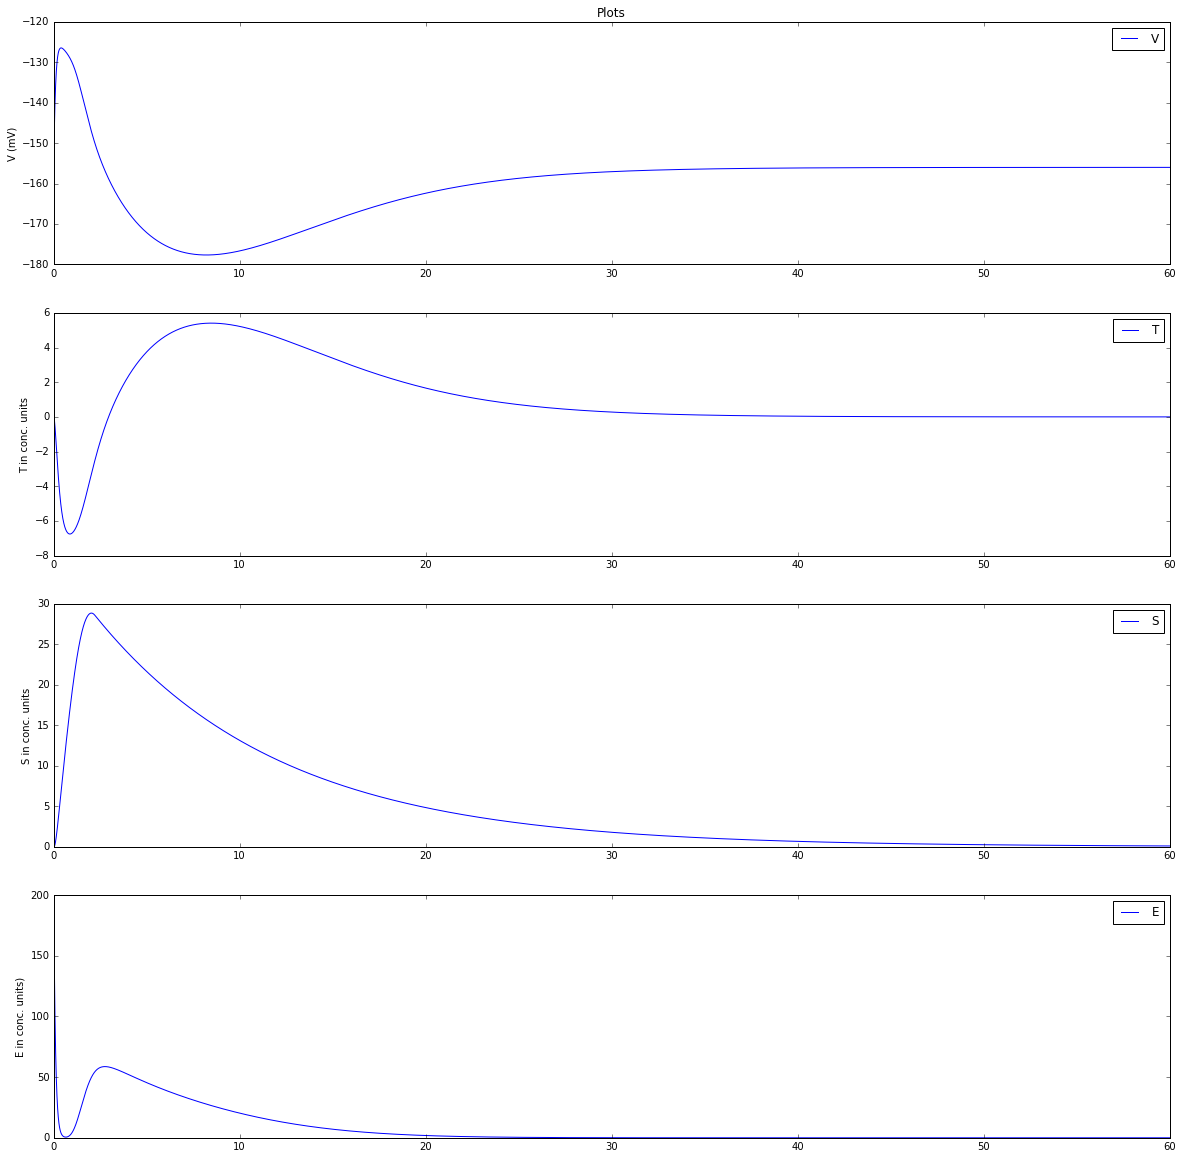

In [50]:
# We plot 4 variables V,T,S,E
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.title('Plots')

plt.subplot(4,1,1)
plt.plot(t, sols['V'])
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(4,1,2)
plt.plot(t, sols['T'])
plt.ylabel('T in conc. units')
plt.legend()


plt.subplot(4,1,3)
plt.plot(t, sols['S'])
plt.ylabel('S in conc. units')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, sols['E'])
plt.ylabel('E in conc. units)')
plt.legend()
plt.show()

plt.close()